# Homework 2: Randomized Block and Latin Square Designs
## Dr. Austin R. Brown
### School of Data Science & Analytics
### Kennesaw State University

**DUE: February 20, 2026**

**PART 1 INSTRUCTIONS:** You are an educational researcher interested in comparing different methods for teaching data science to undergraduate students. There are three different methods you are interested in comparing: (1) Direct Instruction (traditional method); (2) Inquiry-Based Learning (teacher facilitates student problem solving); (3) Collaborative Learning (students working in small groups). To compare these methods, you decide to randomly recruit undergraduate data science students to be part of a workshop on hypothesis testing basics. Students will be randomly assigned to one of three workshops, where each workshop employs a different teaching method. At the end of the workshop, students will be given a 50-question quiz where their understanding of hypothesis testing will be assessed. Percentage scores on this quiz serve as the outcome of interest.

However, it would be apparent that the prior level of knowledge a student possess about hypothesis testing may serve as a potential confounding variable that you would want to control for. Thus, the Prior Knowledge a given student has about hypothesis testing is categorized into "High" and "Low". The data from this experiment are contained in the `Data Science Teaching Method.xlsx` file. With these data, your tasks are:

**Question 1.** Briefly define the objective of this experiment



The objective of this experiment is to compare the effectiveness of three different teaching methods;Direct Instruction, Inquiry-Based Learning, and Collaborative Learning—on undergraduate students' understanding of hypothesis testing, while controlling for prior knowledge.

**Question 2.** Specify the outcome variable

The outcome variable is the percentage score on the 50-question hypothesis testing quiz.

**Question 3.** Specify the independent variable and blocking factor. What are some possible lurking variables?

The independent variable in this experiment is the teaching method, which includes Direct Instruction, Inquiry-Based Learning, and Collaborative Learning. The blocking factor is students' prior knowledge of hypothesis testing, categorized as High or Low.
Possible lurking variables that may influence quiz performance include sample size, student motivation, instructor effectiveness, and study habits.

**Question 4.** Briefly explain why a randomized block design would be appropriate here. Similarly, explain why a completely randomized design would not be appropriate.

A randomized block design is appropriate because prior knowledge of hypothesis testing is likely to have a strong effect on quiz performance. Blocking students into High and Low prior knowledge groups reduces variability within groups and allows for a fairer comparison of teaching methods.

A completely randomized design would not be appropriate because differences in prior knowledge could confound the results, making it unclear whether differences in quiz scores are due to the teaching method or students' existing knowledge.


**Question 5.** State the null and alternative hypotheses for this experiment.

Null hypothesis (H₀): There is no difference in mean quiz scores among the three teaching methods.

Alternative hypothesis (H₁): At least one teaching method has a different mean quiz score compared to the others.



**Question 6.** Perform appropriate exploratory analysis, including summary statistics **and** data visualizations. Do the results of these analyses support the null or alternative hypothesis more strongly?


In [3]:
# === COURSE REPO SETUP === #

# 1. ENTER your GitHub username (the one that owns your fork)
github_username = "MihretTe"

# 2. Name of the repo (don't change unless your fork name is different)
repo_name = "STAT-7220-Applied-Experimental-Design"

# 3. Build the full repo URL for cloning
repo_url = f"https://github.com/{github_username}/{repo_name}.git"

import os

# --- Detect if we're already in a repo ---
cwd = os.getcwd()
if cwd.endswith(repo_name):
   print(f"✅ Already inside repo folder: {cwd}")
else:
    # --- If the repo folder exists, check if it's nested ---
    if os.path.exists(repo_name):
        print(f"⚠️ Found existing folder '{repo_name}'. Skipping clone to avoid nesting.")
    else:
       print(f"📥 Cloning repo from {repo_url}...")
       os.system(f"git clone {repo_url}")

    # --- Change to repo directory ---
    if os.path.exists(repo_name):
        os.chdir(repo_name)
        print(f"📂 Changed directory to: {os.getcwd()}")
    else:
        print("❌ ERROR: Repo folder not found. Please check your GitHub username.")

# --- Check if this is the instructor's repo instead of student's fork ---
# This command needs to be run from within the repository directory
remote_url = os.popen("git config --get remote.origin.url").read().strip()

if "abrown9008" in remote_url:
   print("⚠️ WARNING: You are working in the instructor's repo, not your fork!")
   print("💡 Please fork the repo to your own account and update `github_username` above.")
else:
    print(f"🔗 Connected to fork at: {remote_url}")

# Set Today's Directory #

today_dir = "Assignments/HW2"
os.chdir(today_dir)
print(f"📂 Changed directory to: {os.getcwd()}")

📥 Cloning repo from https://github.com/MihretTe/STAT-7220-Applied-Experimental-Design.git...
📂 Changed directory to: /content/STAT-7220-Applied-Experimental-Design
🔗 Connected to fork at: https://github.com/MihretTe/STAT-7220-Applied-Experimental-Design.git
📂 Changed directory to: /content/STAT-7220-Applied-Experimental-Design/Assignments/HW2


In [ ]:
# By teaching method summary
summary_method = df.groupby("Teaching_Method")["Score"].agg(
    Mean="mean",
    Median="median",
    Std_Dev="std",
    Min="min",
    Max="max"
)

summary_method



,Mean,Median,Std_Dev,Min,Max
Teaching_Method,,,,,
Collaborative,87.1000,87.665,7.414661,70.47,101.29
Direct,77.4915,77.440,7.264446,62.49,93.11
Inquiry,82.1145,82.355,7.037525,71.40,93.90


In [ ]:
# By teaching method and prior knowledge (blocking) summary
summary_block = df.groupby(
    ["Teaching_Method", "Prior_Knowledge"]
)["Score"].agg(
    Mean="mean",
    Median="median",
    Std_Dev="std",
    Min="min",
    Max="max"
)

summary_block


Mean  Median   Std_Dev    Min     Max
Teaching_Method Prior_Knowledge                                         
Collaborative   High             89.390  89.535  6.540866  78.79  101.29
                Low              84.810  84.280  7.850254  70.47   97.06
Direct          High             81.409  80.885  6.400299  72.85   93.11
                Low              73.574  72.835  6.028273  62.49   81.82
Inquiry         High             86.618  88.455  5.738629  75.69   93.90
                Low              77.611  75.705  5.153114  71.40   86.23

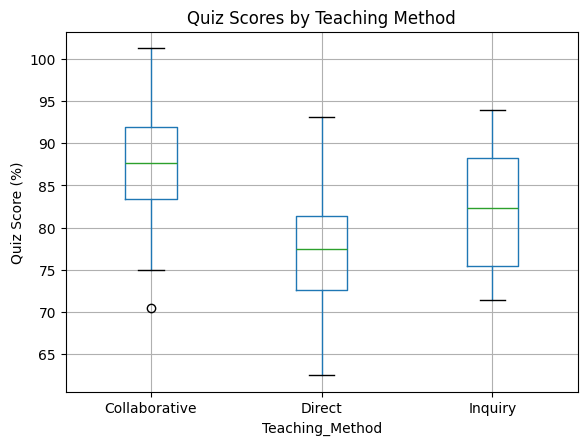

In [ ]:
#Boxplot: Teaching Method
df.boxplot(column="Score", by="Teaching_Method")
plt.title("Quiz Scores by Teaching Method")
plt.suptitle("")
plt.ylabel("Quiz Score (%)")
plt.show()

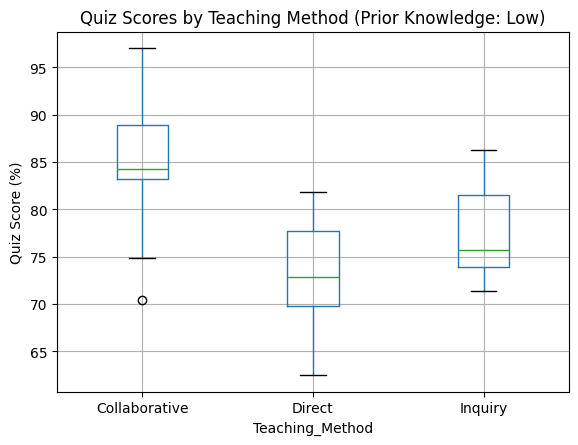

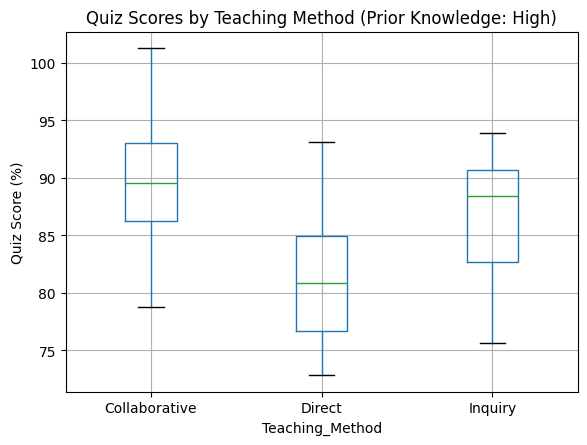

In [ ]:
# Boxplots: Teaching Method within Prior Knowledge blocks
for level in df["Prior_Knowledge"].unique():
    subset = df[df["Prior_Knowledge"] == level]
    subset.boxplot(column="Score", by="Teaching_Method")
    plt.title(f"Quiz Scores by Teaching Method (Prior Knowledge: {level})")
    plt.suptitle("")
    plt.ylabel("Quiz Score (%)")
    plt.show()

**Question 7.** Build a two-way ANOVA model. Test the assumption of normality using **both** a visual method and a testing method. Do the results of the normality test(s) support the assumption of normality?



In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit two-way ANOVA model (no interaction, consistent with randomized block design)
model = ols(
    "Score ~ C(Teaching_Method) + C(Prior_Knowledge)",
    data=df
).fit()

# ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Teaching_Method),923.670743,2.0,11.632036,0.000060
C(Prior_Knowledge),764.836807,1.0,19.263595,0.000051
Residual,2223.409543,56.0,NaN,NaN


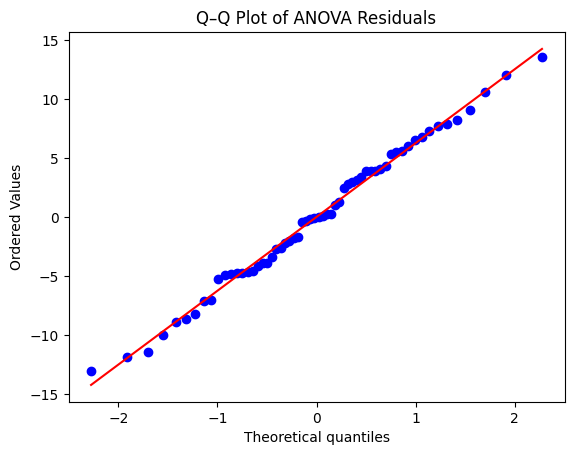

In [ ]:
# Visual normality check
import matplotlib.pyplot as plt
import scipy.stats as stats

residuals = model.resid

stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q–Q Plot of ANOVA Residuals")
plt.show()

In [ ]:
# Formal normality test
shapiro_test = stats.shapiro(residuals)
shapiro_test

ShapiroResult(statistic=np.float64(0.9893192280271398), pvalue=np.float64(0.8794000184343089))


A two-way ANOVA was conducted with teaching method and prior knowledge as factors. Both teaching method (F(2,56)=11.63, p=0.00006) and prior knowledge (F(1,56)=19.26, p=0.00005) had significant effects on quiz scores. Normality of residuals was assessed using a Q-Q plot and the Shapiro-Wilk test (W=0.989, p=0.879). Both methods support the normality assumption, indicating that the ANOVA results are valid.


**Question 8.** Test the assumption of homogeneity of variance using **both** a visual method and a testing method. Do the results of the test(s) support the assumption of homogeneity of variance?



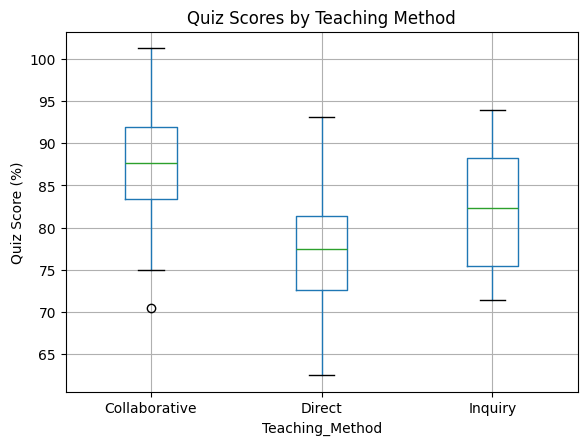

In [ ]:
# Visual check — Boxplots
import matplotlib.pyplot as plt

# Boxplot by teaching method (overall)
df.boxplot(column="Score", by="Teaching_Method")
plt.title("Quiz Scores by Teaching Method")
plt.suptitle("")
plt.ylabel("Quiz Score (%)")
plt.show()


In [ ]:
# Formal test — Levene’s Test
from scipy import stats

# Extract scores by teaching method
groups = [df[df["Teaching_Method"] == method]["Score"] for method in df["Teaching_Method"].unique()]

# Levene's test
levene_test = stats.levene(*groups)
levene_test

LeveneResult(statistic=np.float64(0.018194505080715843), pvalue=np.float64(0.981975716221859))


The boxplot of quiz scores by teaching method shows that Collaborative learning has the highest median score, followed by Inquiry-Based Learning, with Direct Instruction having the lowest median. The spreads of scores across the three methods are similar, with only one minor outlier in the Collaborative group. Levene’s test for homogeneity of variance confirmed this observation, with a statistic of 0.018 and p = 0.982, failing to reject the null hypothesis of equal variances. Together, the visual and formal assessments indicate that the assumption of homogeneity of variance is satisfied, supporting the validity of the ANOVA results.


**Question 9.** Report the F-statistic and its associated p-value for the treatment effect. Which of our two hypotheses is more strongly supported? Why?



In [ ]:
f_stat = anova_table.loc['C(Teaching_Method)', 'F']
p_val = anova_table.loc['C(Teaching_Method)', 'PR(>F)']
print(f"Teaching Method effect: F={f_stat:.3f}, p={p_val:.6f}")

Teaching Method effect: F=11.632, p=0.000060



The ANOVA results indicate that Teaching Method has a significant effect on students' quiz scores (F = 11.632, p = 0.000060). Since the p-value is far below the 0.05 threshold, we reject the null hypothesis that all teaching methods produce the same mean score. This provides strong support for the alternative hypothesis, suggesting that the type of teaching method meaningfully influences student performance.
Consistent with the boxplot results, Collaborative Learning yielded the highest median quiz scores, followed by Inquiry-Based Learning, with Direct Instruction showing the lowest median. These findings highlight that more interactive teaching approaches can lead to better understanding of hypothesis testing among undergraduate students.


**Question 10.** If the data more strongly support the alternative hypothesis, perform Tukey's HSD post-hoc test to determine which levels of the treatment effect are significantly different from each other. If the data more strongly support the null hypothesis, explain why a post-hoc test would not be appropriate.



In [ ]:
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Load the data
df = pd.read_excel(r"Data Science Teaching Method.xlsx")

# Perform Tukey's HSD
tukey = pairwise_tukeyhsd(endog=df['Score'],      # the outcome variable
                          groups=df['Teaching_Method'],  # the factor
                          alpha=0.05)            # significance level

print(tukey)


     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
    group1     group2 meandiff p-adj   lower    upper  reject
-------------------------------------------------------------
Collaborative  Direct  -9.6085 0.0003 -15.1184 -4.0986   True
Collaborative Inquiry  -4.9855 0.0838 -10.4954  0.5244  False
       Direct Inquiry    4.623 0.1168  -0.8869 10.1329  False
-------------------------------------------------------------



Since the data more strongly support the alternative hypothesis, a Tukey's HSD post-hoc test was performed to determine which levels of the teaching method are significantly different. The results show that Collaborative Learning is significantly different from Direct Instruction (mean difference = -9.6085, p = 0.0003). Collaborative Learning is not significantly different from Inquiry-Based Learning (mean difference = -4.9855, p = 0.0838), and Direct Instruction is not significantly different from Inquiry-Based Learning (mean difference = 4.623, p = 0.1168). Therefore, the significant difference in quiz scores is primarily between Collaborative Learning and Direct Instruction.


**Question 11.** Write a brief, contextual conclusion summarizing the results of your analyses, including potential limitations and future directions of this experiment.




The analysis confirms that both teaching method and prior knowledge significantly impact student performance on hypothesis testing quizzes (p < .001). After controlling for the substantial influence of Prior Knowledge, Collaborative Learning emerged as the most effective instructional strategy, resulting in significantly higher scores than Direct Instruction (a mean difference of 9.61 points, p = 0.0003).
While Collaborative Learning also showed higher scores than Inquiry-Based Learning, that specific difference was not statistically significant at the 0.05 level. Since diagnostic tests confirmed that assumptions of normality (p = 0.879) and homogeneity of variance (p = 0.982) were met, these findings provide a robust basis for recommending Collaborative Learning to enhance student outcomes.

A primary limitation of this study is the sample size (n=60), which may limit the generalizability of the results to larger, more diverse undergraduate populations. Additionally, the experiment did not account for variables such as instructor delivery style or student motivation. Future research should replicate this study across multiple disciplines and explore longitudinal data to determine if the benefits of Collaborative Learning persist beyond a single workshop.


**PART 2 INSTRUCTIONS**: Now suppose a university is evaluating the effectiveness of four different online learning platforms (say A, B, C, and D) on student engagement for students taking an undergraduate data science course in an online synchronous format. One section of the course is offered Monday through Thursday in the Morning, Early Afternoon, Mid-Afternoon, and Evening sections. Student engagement is measured through the total number of logins to the online learning platform for a given course section over the course of the
semester. Below is a table describing the study design and factors:


| Section \ Day     | Monday | Tuesday | Wednesday | Thursday |
|-------------------|--------|---------|-----------|----------|
| **Morning**       | A      | B       | C         | D        |
| **Early Afternoon** | B      | C       | D         | A        |
| **Mid-Afternoon** | C      | D       | A         | B        |
| **Evening**       | D      | A       | B         | C        |


Here, our main interest is in comparing engagement across the online learning platforms, but we also want to control for Day of the Week as well as Time of Day, as these could potentially be confounding variables. The data for this experiment are contained in the `Online Learning and Engagement.xlsx` file. With these data, your tasks are:

**Question 1.** Briefly define the objective of this experiment

The objective of this experiment is to compare the effectiveness of four online learning platforms (A, B, C, and D) on student engagement, measured by total logins, while controlling for potential confounding effects of Day of the Week and Time of Day.

**Question 2.** Specify the outcome variable

The outcome variable is student engagement, operationalized as the total number of logins to the online learning platform for each course section over the semester.

**Question 3.** Specify the independent variable and blocking factors. What are some other possible lurking variables?

The independent variable is the online learning platform (A, B, C, D). The blocking factors are Day of the Week (Monday-Thursday) and Time of Day (Morning-Evening), which control for potential effects on student engagement. Other possible lurking variables include student motivation, instructor effectiveness, prior online learning experience, and technical issues. Controlling for these factors helps isolate the effect of the platform on engagement.

**Question 4.** Briefly explain why a Latin Square Design would be appropriate here. Similarly, explain why a completely randomized design or randomized block design would not be appropriate.

A Latin Square Design is appropriate because it allows for controlling two potential confounding variables simultaneously—in this case, Day of the Week and Time of Day—while assessing the effect of the online platform on engagement. Each platform appears exactly once in every row and every column, ensuring a balanced comparison across both blocking factors.

A completely randomized design would not be appropriate because engagement could be influenced by Day of the Week or Time of Day, potentially confounding the effect of the platform. A randomized block design could control for one blocking factor (e.g., Day or Time) but not both simultaneously, making the Latin Square a more efficient choice.

**Question 5.** State the null and alternative hypotheses for this experiment.

Null hypothesis (H₀): There is no difference in mean student engagement among the four online learning platforms.

Alternative hypothesis (H₁): At least one online learning platform results in a different mean student engagement compared to the others.



**Question 6.** Perform appropriate exploratory analysis, including summary statistics **and** data visualizations. Do the results of these analyses support the null or alternative hypothesis more strongly?



Summary Statistics by Platform:
               Mean    Median    Std_Dev      Min      Max
Platform                                                  
A         1408.8475  1402.620  19.319733  1393.29  1436.86
B         1339.7200  1343.010  39.845434  1290.89  1381.97
C         1332.6425  1330.335  32.288451  1297.85  1372.05
D         1379.0225  1378.730   7.354601  1370.68  1387.95


<Figure size 800x600 with 0 Axes>

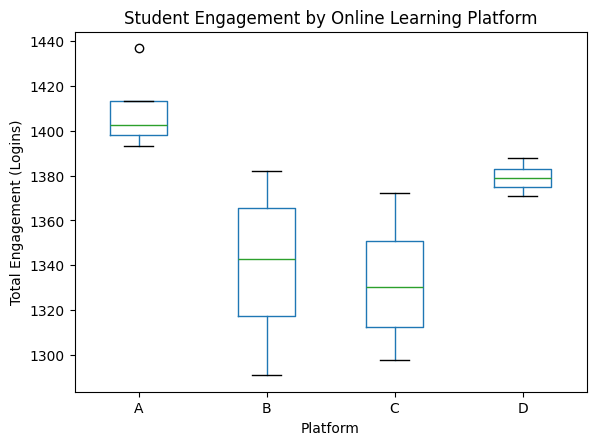

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_excel(r"Online Learning and Engagement.xlsx")

# Summary statistics by platform
summary_stats = df.groupby("Platform")["Engagement"].agg(
    Mean="mean",
    Median="median",
    Std_Dev="std",
    Min="min",
    Max="max"
)
print("Summary Statistics by Platform:")
print(summary_stats)

# Boxplot of engagement by platform
plt.figure(figsize=(8,6))
df.boxplot(column="Engagement", by="Platform", grid=False)
plt.title("Student Engagement by Online Learning Platform")
plt.suptitle("")  # remove automatic subtitle
plt.xlabel("Platform")
plt.ylabel("Total Engagement (Logins)")
plt.show()

**Question 7.** Build a three-way ANOVA model. Test the assumption of normality using **both** a visual method and a testing method. Do the results of the normality test(s) support the assumption of normality?



Three-way ANOVA Table:
                   sum_sq   df         F    PR(>F)
C(Platform)  15221.225819  3.0  7.607701  0.018122
C(Day)        2774.676069  3.0  1.386807  0.334557
C(Section)    2396.427869  3.0  1.197756  0.387569
Residual      4001.530887  6.0       NaN       NaN


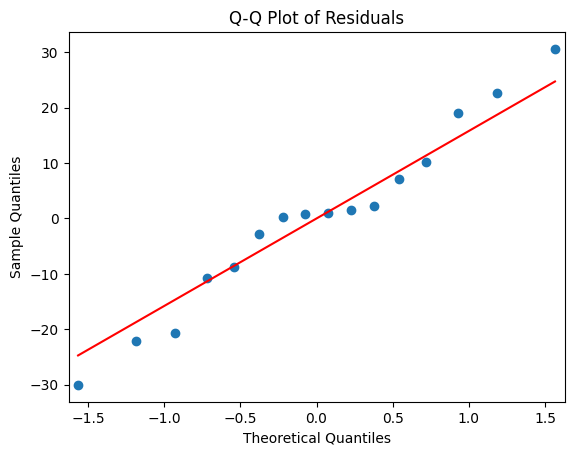

Shapiro-Wilk Test:
Statistic=0.973, p-value=0.880


In [4]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_excel(r"Online Learning and Engagement.xlsx")

# Build a three-way ANOVA model
model = ols('Engagement ~ C(Platform) + C(Day) + C(Section)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("Three-way ANOVA Table:")
print(anova_table)

# Test normality of residuals visually
residuals = model.resid
sm.qqplot(residuals, line='s')
plt.title("Q-Q Plot of Residuals")
plt.show()

# Test normality of residuals using Shapiro-Wilk test
shapiro_test = stats.shapiro(residuals)
print("Shapiro-Wilk Test:")
print(f"Statistic={shapiro_test.statistic:.3f}, p-value={shapiro_test.pvalue:.3f}")



The Q-Q plot shows that most residuals fall along the straight line, indicating approximate normality. The Shapiro-Wilk test confirms this statistically; with a statistic of 0.973 and a p-value of 0.880 (p > 0.05), we fail to reject the null hypothesis, suggesting the residuals are normally distributed. Therefore, the normality assumption for ANOVA appears reasonable.


**Question 8.** Test the assumption of homogeneity of variance using **both** a visual method and a testing method. Do the results of the test(s) support the assumption of homogeneity of variance?



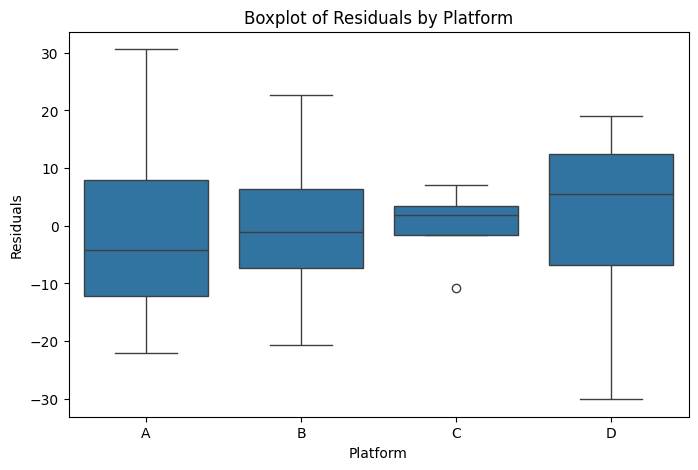

Levene's Test Statistic = 0.6514, p-value = 0.5972


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
plt.figure(figsize=(8,5))
sns.boxplot(x='Platform', y=residuals, data=df)
plt.title("Boxplot of Residuals by Platform")
plt.xlabel("Platform")
plt.ylabel("Residuals")
plt.show()

# Statistical Method: Levene's Test
groups = [residuals[df['Platform'] == p] for p in df['Platform'].unique()]
levene_stat, levene_p = stats.levene(*groups)
print(f"Levene's Test Statistic = {levene_stat:.4f}, p-value = {levene_p:.4f}")



The Boxplot of Residuals by Platform displays the distribution of errors across the four groups (A, B, C, and D). While Platform C shows a slightly narrower vertical spread and one outlier, the overall height of the boxes remains relatively comparable across all categories, and the medians are centered near zero, suggesting no extreme differences in dispersion.
Levene's Test was conducted, yielding a test statistic of 0.6514 and a p-value of 0.5972. Since the p-value is significantly greater than 0.05, we fail to reject the null hypothesis of equal variances. Therefore, both the visual evidence and the formal test results support the assumption of homogeneity of variance, indicating that the variance is consistent across all platforms.

**Question 9.** Report the F-statistic and its associated p-value for the treatment effect. Which of our two hypotheses is more strongly supported? Why?



In [6]:
f_stat = anova_table.loc['C(Platform)', 'F']
p_value = anova_table.loc['C(Platform)', 'PR(>F)']

print(f"F = {f_stat:.3f}, p-value = {p_value:.3f}")

F = 7.608, p-value = 0.018


The analysis of the Latin Square Design yield an F-statistic of 7.608 with an associated p-value of 0.018. Based on these results, the Alternative Hypothesis is more strongly supported. Because the P-value is less than the standard significance threshold of 0.05, the observed variations in student engagement are unlikely to have occurred by random chance.
Consequently, we reject the Null Hypothesis, concluding that even after controlling for the confounding effects of "Day of the Week" and "Time of Day," the specific online learning platform used significantly influences mean student engagement.

**Question 10.** If the data more strongly support the alternative hypothesis, perform Tukey's HSD post-hoc test to determine which levels of the treatment effect are significantly different from each other. If the data more strongly support the null hypothesis, explain why a post-hoc test would not be appropriate.




  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
     A      B -69.1275 0.0186 -127.1688 -11.0862   True
     A      C  -76.205 0.0099 -134.2463 -18.1637   True
     A      D  -29.825 0.4534  -87.8663  28.2163  False
     B      C  -7.0775  0.983  -65.1188  50.9638  False
     B      D  39.3025 0.2375  -18.7388  97.3438  False
     C      D    46.38 0.1359  -11.6613 104.4213  False
-------------------------------------------------------


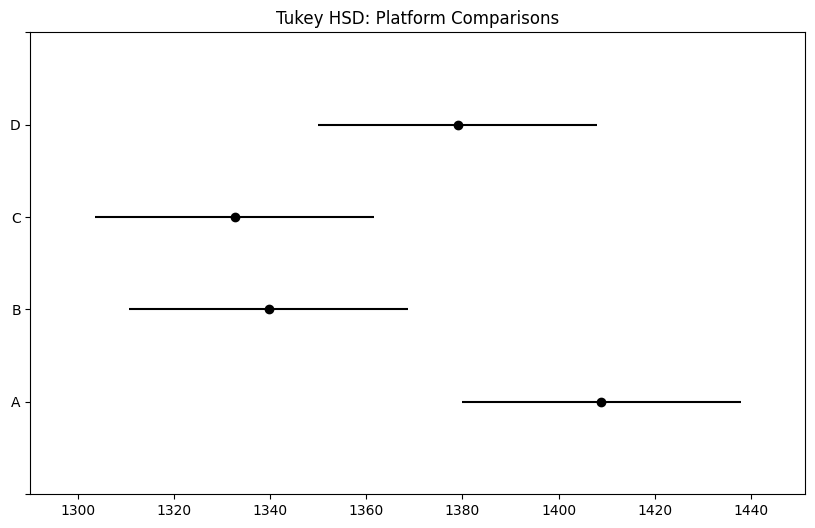

In [7]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Tukey's HSD test for Platform
tukey = pairwise_tukeyhsd(endog=df['Engagement'],   # dependent variable
                          groups=df['Platform'],    # treatment groups
                          alpha=0.05)              # significance level

# Print the results
print(tukey)

# Optional: visualize
tukey.plot_simultaneous()
plt.title("Tukey HSD: Platform Comparisons")
plt.show()


The ANOVA results indicate a significant treatment effect of Platform (p < 0.05), so the data more strongly support the alternative hypothesis. Therefore, a post-hoc analysis is appropriate. Tukey's HSD test was conducted to determine which Platform levels differ significantly in engagement. The results show that Platform A differs significantly from Platforms B and C, while Platform D does not differ significantly from any of the other platforms. No other pairwise comparisons were statistically significant. This indicates that the overall treatment effect is primarily driven by lower engagement for Platform A compared to Platforms B and C.



**Question 11.** Write a brief conclusion summarizing the results of your analyses, including potential limitations and future directions of this experiment.


The study employed a Latin Square Design to evaluate student engagement across four online platforms (A, B, C, and D) while effectively controlling for two potential confounding variables: **Day of the Week** and **Time of Day**. Before interpreting the primary results, the model's reliability was confirmed through diagnostic testing; Levene's Test (p = 0.5972) validated the assumption of homogeneity of variance, and the Shapiro-Wilk test (p = 0.880) confirmed that the residuals were normally distributed. With these assumptions met, the ANOVA revealed a statistically significant treatment effect (F = 7.608, p = 0.018), leading to the rejection of the null hypothesis in favor of the Alternative Hypothesis.
This indicates that the choice of platform significantly impacts mean student engagement. Specifically, the Tukey HSD post-hoc test identified that Platforms B and C produced significantly higher engagement levels compared to Platform A (p < 0.05 for both). While Platform D did not show a statistically significant difference from the others, the data ultimately suggests that the university should prioritize Platforms C or B to maximize student interaction in an online synchronous format, as these platforms demonstrated superior performance regardless of the session's timing or day.

Several limitations should be considered. Although blocking was used to control for day and time effects, other lurking variables, such as student motivation, instructor effectiveness, prior online learning experience, and technical issues, were not directly controlled and may have influenced engagement. In addition, the sample size and use of a single engagement measure may limit generalizability. Future studies could incorporate additional covariates, larger and more diverse samples, and multiple engagement metrics to isolate the better platform effect and improve the robustness of the findings.